In [1]:
import numpy as np
from matplotlib import pyplot as plt
import polars as pl



In [24]:
import summary_stats_zero as ssz

reload(ssz)

<module 'summary_stats_zero' from '/home/davidwu/REPOS/echidna_network/summary_stats_zero.py'>

In [25]:
rlzs = ssz.RealisationArray("./zero_temp_delay_sims", "delay_sim")

In [28]:
rlzs.metadata.filter(pl.col('delay').eq(26)).select('row_nr').to_series().to_numpy()

array([   12,    35,    51, ..., 32402, 32413, 32415], dtype=uint32)

In [18]:
zrlzs = ssz.RealisationArray("./zero_sims", 'zero_delay')

In [ ]:
year1_filter = rlzs.metadata.filter(pl.col('delay').eq(26)).select('row_nr').to_series().to_numpy()

year1_hitting = rlzs.collect('hitting_time', filter=year1_filter)

In [49]:
year1_seed = rlzs.metadata.filter(pl.col('delay').eq(26)).select('seed').to_series().to_numpy().reshape((-1, 1))

In [57]:
year1_hitting_df = pl.from_numpy(np.hstack([np.vstack(year1_hitting), year1_seed]), schema=[*(f'hosp_{i}' for i in range(len(year1_hitting[0]))), 'seed']).fill_nan(None)
year1_hitting_arr = year1_hitting_df.group_by('seed').mean().sort('seed').drop('seed').to_numpy()

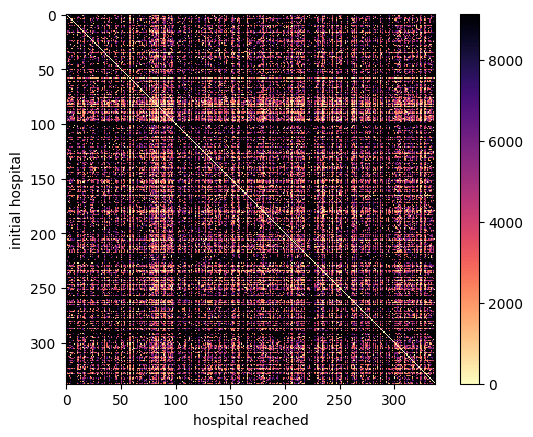

In [61]:
plt.imshow(year1_hitting_arr, cmap='magma_r', interpolation='nearest')

plt.colorbar()
plt.gca().set_facecolor('black')
plt.xlabel('hospital reached')
plt.ylabel('initial hospital')
plt.savefig('zero_temp_delay_sims/analysis/delay26_mean_hitting.png', dpi=360)